In [2]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
x = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]
y1 = [0,0,0,0,1,1,1,2,1,1,2,1,1]

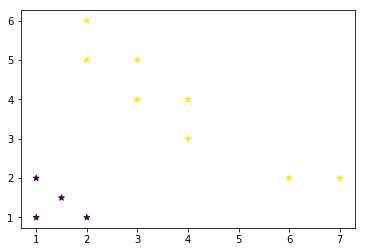

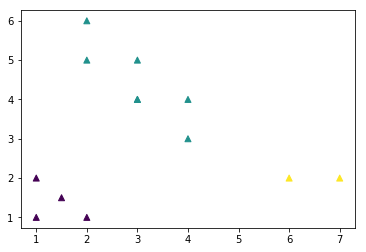

In [4]:
# plotting the points acc to classes

x_X1 = x[:,0]
x_X2 = x[:,1]

plt.scatter(x_X1,x_X2, c = y,marker = "*")
plt.show()

plt.scatter(x_X1,x_X2, c = y1,marker = "^")
plt.show()

In [5]:
SVClin = SVC(kernel='linear',C=1).fit(x,y)
print("When only two classes , intercept and coeff are:")
print("Intercept : ",SVClin.intercept_)
print("Coeff : ",SVClin.coef_)
print()

SVClin1 = SVC(kernel='linear',C=1).fit(x,y1)
print("When three classes , intercept and coeff are:")
print("Intercept : ",SVClin1.intercept_)
print("Coeff: ",SVClin1.coef_)

When only two classes , intercept and coeff are:
Intercept :  [-2.49953185]
Coeff :  [[ 0.49989823  0.49989823]]

When three classes , intercept and coeff are:
Intercept :  [ 2.49953185  2.05882353  3.        ]
Coeff:  [[-0.49989823 -0.49989823]
 [-0.47058824 -0.11764706]
 [-0.8         0.4       ]]


[ 5.00008143 -1.99991857]


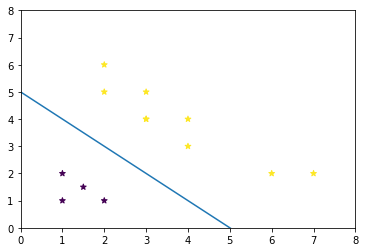

In [54]:
# Working further on two classes model

x1 = np.array([0, 7])
x2 = -1 *(SVClin.intercept_ + SVClin.coef_[0][0] * x1)/SVClin.coef_[0][1]
print(x2)

plt.plot(x1,x2)
plt.scatter(x_X1,x_X2,c=y,marker="*")
plt.axis([0,8,0,8])
plt.show()

It can be seen above that when C=1 , the decision boundary i schoosen by SVC such that it has distance d from points as much as possible  .



case 1: It could be the line connecting (4,0) and (0,4) ==> closer to purple points(y==0)



case 2: It could be the line connecting (6,0) and (0,6) ==> closer to yellow ones (y==1)

[ 6.5 -3.5]


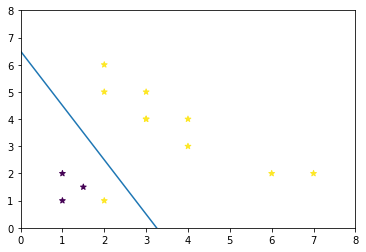

In [6]:
# tweaking with our code 
# lets make one of the purple * to yellow ones and see how svc behaves 

y2 = [0,1,0,0,1,1,1,1,1,1,1,1,1]
SVClin = SVC(kernel='linear',C=1).fit(x,y2)

x1 = np.array([0, 5])
x2 = -1 *(SVClin.intercept_ + SVClin.coef_[0][0] * x1)/SVClin.coef_[0][1]
print(x2)

plt.plot(x1,x2)
plt.scatter(x_X1,x_X2,c=y2,marker="*")
plt.axis([0,8,0,8])
plt.show()

The line somewhat changes a bit but as value of C was low , SVC doesnt overfit . It keeps the line while making error for point (2,1).

Lets change value of C in the next segment and see SVC decision boundary is affected.

[  3.15087047e+16  -5.85193074e+16]


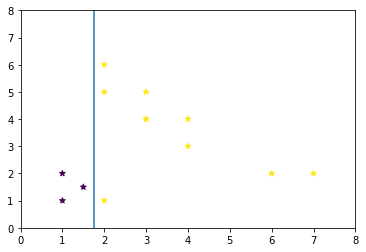

In [8]:
SVClin = SVC(kernel='linear',C=100000).fit(x,y2)

x1 = np.array([0, 5])
x2 = -1 *(SVClin.intercept_ + SVClin.coef_[0][0] * x1)/SVClin.coef_[0][1]
print(x2)

plt.plot(x1,x2)
plt.scatter(x_X1,x_X2,c=y2,marker="*")
plt.axis([0,8,0,8])
plt.show()

# working for three classes in y1 . (0,1,2)

In [13]:
def make_grid(x1,x2,h = 0.02): # grid function for two features
    x1_max , x1_min = x1.max()+1 , x1.min()-1
    x2_max , x2_min = x2.max()+1 , x2.min()-1
    
    a = np.arange(x1_min,x2_max,h)
    b = np.arange(x2_min,x2_max,h)
    
    xx , yy = np.meshgrid(a,b)
    return xx,yy

In [17]:
# kernel is gaussian , so the decision boundary is not linear
clf = SVC()
clf.fit(x,y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

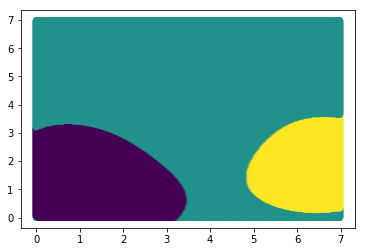

In [16]:
xx, yy = make_grid(x[:, 0], x[:, 1])
# ravel converts the array into 1d array
# np.c_ combines xx and yy i.e. each combination taken
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])


plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

In [19]:
# with linear kernel

clf1 = SVC(kernel = 'linear')
clf1.fit(x,y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

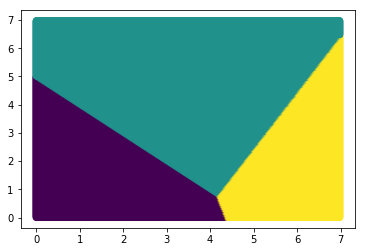

In [20]:
xx , yy = make_grid(x[:,0],x[:,1]) # yy is not output , it stores feature 1 grid values 

predictions = clf1.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(),c = predictions)
plt.show()